In [1]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input/datasett1'):
    for filename in filenames:
        (os.path.join(dirname, filename))

In [20]:
import numpy as np
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import cv2
import random
import os
from PIL import Image

import pandas as pd
from xml.dom import minidom
import csv

In [21]:
image_dir='/kaggle/input/datasett1/proje/dataset/images'
annot_dir='/kaggle/input/datasett1/proje/dataset/annotations/xmls'

In [22]:
import cv2
import numpy as np
def rescaling(path_image,targetSize,xmin,ymin,xmax,ymax):
    imageToPredict = cv2.imread(path_image, 3)

    y_ = imageToPredict.shape[0]
    x_ = imageToPredict.shape[1]

    x_scale = targetSize / x_
    y_scale = targetSize / y_
    img = cv2.resize(imageToPredict, (targetSize, targetSize));
    img = np.array(img);
    
    (origLeft, origTop, origRight, origBottom) = (xmin,ymin,xmax,ymax)

    xmin = int(np.round(origLeft * x_scale))
    ymin = int(np.round(origTop * y_scale))
    xmax = int(np.round(origRight * x_scale))
    ymax = int(np.round(origBottom * y_scale))
    return img,xmin,ymin,xmax,ymax

In [23]:
def exteract_xml_contents(annot_directory,image_dir ,target_size=300):
    
    file=minidom.parse(annot_directory)
    
    height,width=cv2.imread(image_dir).shape[:2]
    
    
    xmin=file.getElementsByTagName('xmin')
    x1=float(xmin[0].firstChild.data)
    
    ymin=file.getElementsByTagName('ymin')
    y1=float(ymin[0].firstChild.data)
    
    xmax=file.getElementsByTagName('xmax')
    x2=float(xmax[0].firstChild.data)
    
    ymax=file.getElementsByTagName('ymax')
    y2=float(ymax[0].firstChild.data)
    
    class_name=file.getElementsByTagName('name')
    if class_name[0].firstChild.data=='knife':
        class_num=1
    else:
        class_num=0
        
    files=file.getElementsByTagName('filename')
    file_name=files[0].firstChild.data
    
    img,xmin,ymin,xmax,ymax=rescaling(image_dir,target_size,x1,y1,x2,y2)
    width=img.shape[0]
    height=img.shape[1]
    return file_name,width,height,class_num,xmin,ymin,xmax,ymax

In [24]:
def xml_to_csv(image_dir,annot_dir):
    
    xml_list=[]
    
    mat_files=os.listdir(annot_dir)
    img_files=os.listdir(image_dir)
    
    
    for i,image in enumerate(img_files):
        xp=image.split('.')
        mat_path=os.path.join(annot_dir,(str(xp[0])+'.xml'))
        img_path=os.path.join(image_dir,image)

        value=exteract_xml_contents(mat_path,img_path)
        
        xml_list.append(value)
    
    columns_name=['file_name','width','height','class_num',
                 'xmin','ymin','xmax','ymax']
    
    xml_df=pd.DataFrame(xml_list,columns=columns_name)
    
    
    return xml_df

In [25]:
train_labels_df=xml_to_csv(image_dir,annot_dir)
train_labels_df.to_csv(('dataset.csv'),index=None)

In [26]:
train_labels_df

,file_name,width,height,class_num,xmin,ymin,xmax,ymax
0,KravMagaKnifeDefenseTechniques773.jpg,300,300,1,120,193,160,220
1,billete_0013.jpg,300,300,0,91,1,289,295
2,KravMagaTraining21141.jpg,300,300,1,176,139,215,194
3,DefenseKnifeAttack0731.jpg,300,300,1,122,250,164,278
4,KravMagaTraining688.jpg,300,300,1,142,121,157,178
...,...,...,...,...,...,...,...,...
817,DefenseKnifeAttack1422.jpg,300,300,1,111,51,148,89
818,KravMagaKnifeDefenseTechniques246.jpg,300,300,1,173,77,209,100
819,DSC_00491.jpg,300,300,1,82,177,118,192
820,DefenseKnifeAttack0456.jpg,300,300,1,55,230,85,286


In [27]:
class_list=sorted(['knife',' weapon'])

In [28]:
def preprocess_dataset(image_dir,csv_file):
    
    labels =[]
    boxes =[]
    img_list=[]
    
    
    with open(csv_file) as csvfile:
        
        rows=csv.reader(csvfile)
        columns=next(iter(rows))
        none={}
        for i,row in enumerate(rows):
            
            img_path=row[0]
            full_path=os.path.join(image_dir,img_path)
            img=cv2.imread(full_path)
            if img is None:
                none[i]=str(full_path)
            else:
                img=cv2.imread(full_path)
                
                image=cv2.resize(img,(300,300))
                

                image = image.astype("float") / 255.0

                img_list.append(image)

                labels.append(int(row[3]))
                
                arr=[float(row[4])/300,
                    float(row[5])/300,
                    float(row[6])/300,
                    float(row[7])/300]
                boxes.append(arr)
            
           
        return labels ,boxes,img_list,none

In [29]:
train_labels,train_boxes,train_img,train_none=preprocess_dataset(image_dir,'dataset.csv')

[ WARN:0@50.176] global loadsave.cpp:248 findDecoder imread_('/kaggle/input/datasett1/proje/dataset/images/billete_0160.jpg'): can't open/read file: check file path/integrity
[ WARN:0@53.500] global loadsave.cpp:248 findDecoder imread_('/kaggle/input/datasett1/proje/dataset/images/billete_0177.jpg'): can't open/read file: check file path/integrity
[ WARN:0@56.243] global loadsave.cpp:248 findDecoder imread_('/kaggle/input/datasett1/proje/dataset/images/billete_2113.jpg'): can't open/read file: check file path/integrity
[ WARN:0@56.411] global loadsave.cpp:248 findDecoder imread_('/kaggle/input/datasett1/proje/dataset/images/billete_0180.jpg'): can't open/read file: check file path/integrity
[ WARN:0@57.598] global loadsave.cpp:248 findDecoder imread_('/kaggle/input/datasett1/proje/dataset/images/billete_0174.jpg'): can't open/read file: check file path/integrity
[ WARN:0@57.599] global loadsave.cpp:248 findDecoder imread_('/kaggle/input/datasett1/proje/dataset/images/billete_2112.jpg')

In [30]:
#combined_list=list(zip(train_img,train_boxes,train_labels))
#random.shuffle(combined_list)
#exteract back the content of each list
#train_img,train_boxes,train_labels=zip(*combined_list)

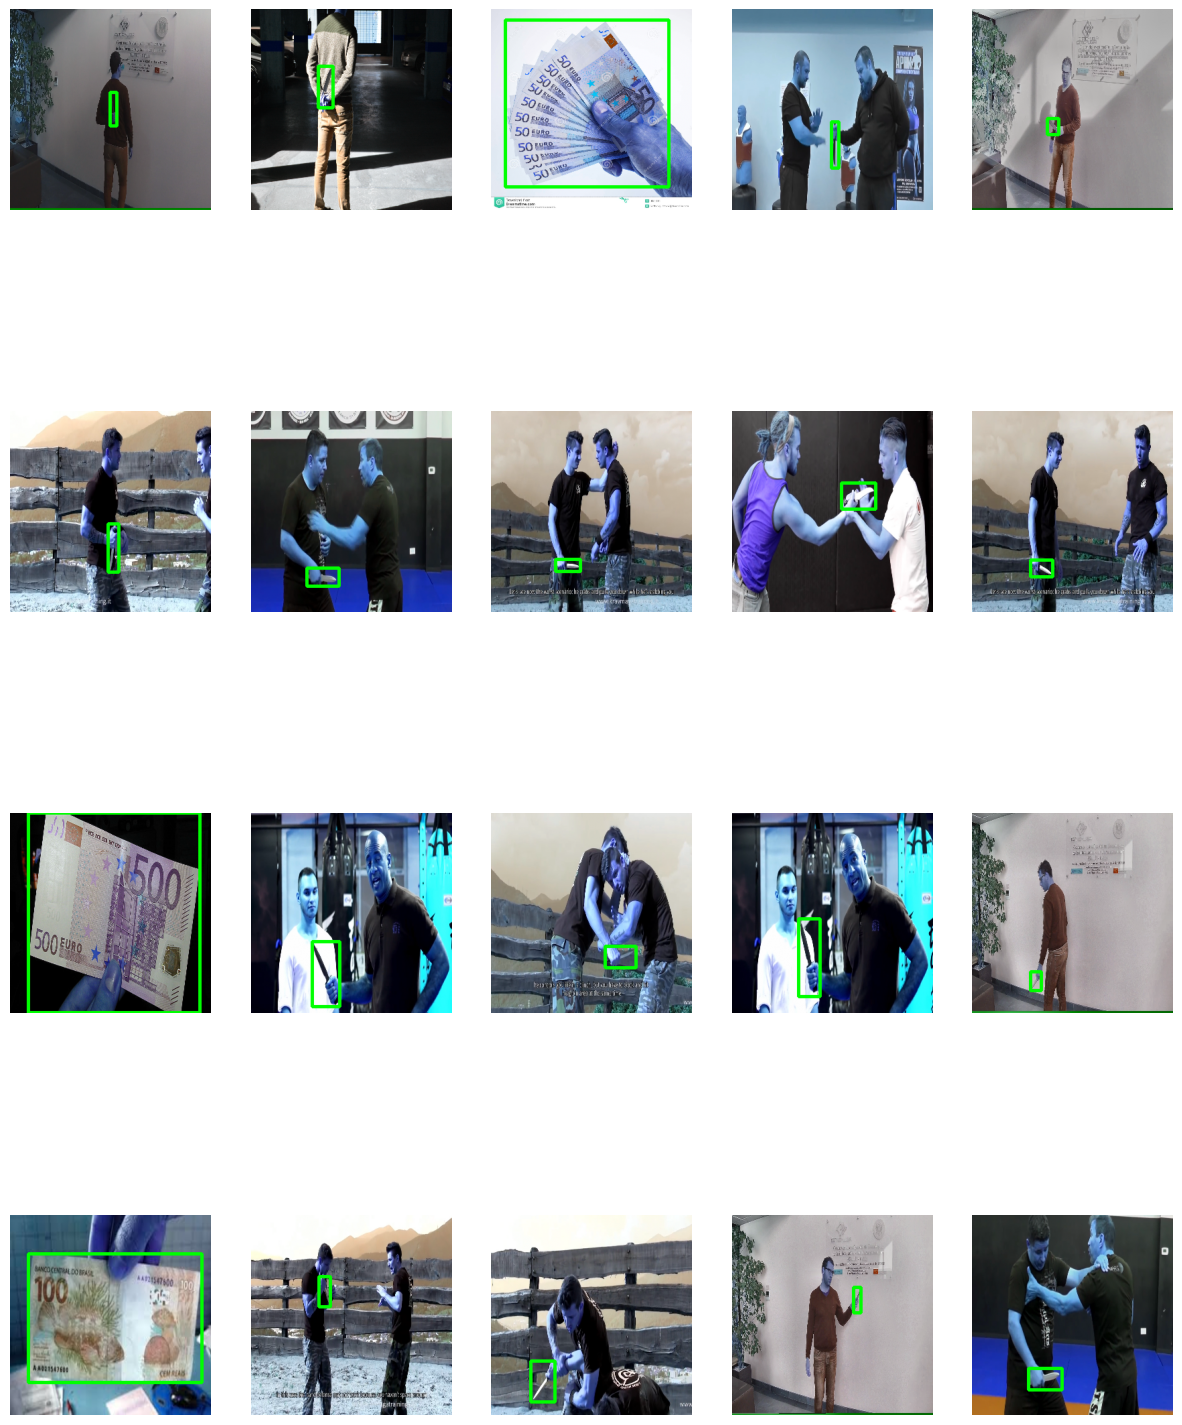

In [31]:

plt.figure(figsize=(15,20));


random_range = random.sample(range(1, len(train_img)), 20)

for itr, i in enumerate(random_range,1):

    a1, b1, a2, b2 = train_boxes[i];
    img_size = 300

    
    x1 = a1 * img_size
    x2 = a2 * img_size
    y1 = b1 * img_size
    y2 = b2 * img_size


    image = train_img[i]

    cv2.rectangle(image, (int(x1),int(y1)),
          (int(x2),int(y2)),
                  (0,255,0),
                  3);
    
    img = np.clip(train_img[i], 0, 1)
    plt.subplot(4, 5, itr);
    plt.imshow(img);
    plt.axis('off');

In [32]:

train_images, val_images, train_labels,val_labels, train_boxes, val_boxes = train_test_split( np.array(train_img), 
                np.array(train_labels), np.array(train_boxes), test_size = 0.1,random_state = 43)
 
print('Total Training Images: {}, Total Test Images: {}'.format(
    len(train_images), 
    len(val_images)))

Total Training Images: 721, Total Test Images: 81


In [33]:
import keras 
import tensorflow as tf
from tensorflow.keras.layers import Dense,Input
from tensorflow.keras.models import Model

from tensorflow.keras.layers import GlobalAveragePooling2D,Dropout
from tensorflow.keras.optimizers import SGD
image_size=300

In [34]:
N_mobile = tf.keras.applications.NASNetMobile( input_tensor = Input(
    shape=(image_size, image_size, 3)), 
    include_top=False, 
    weights='imagenet')

19993432/19993432 [==============================] - 0s 0us/step


In [35]:
def create_model(no_of_classes):
 
    N_mobile.trainable = False
    base_model_output = N_mobile.output
    flattened_output = GlobalAveragePooling2D()(base_model_output)
    print(flattened_output.shape)
    class_prediction = Dense(256, activation="relu")(flattened_output)
    class_prediction = Dense(128, activation="relu")(class_prediction )
    class_prediction = Dropout(0.2)(class_prediction)
    class_prediction = Dense(64, activation="relu")(class_prediction)
    class_prediction = Dropout(0.2)(class_prediction )
    class_prediction = Dense(32, activation="relu")(class_prediction)
    class_prediction = Dense(no_of_classes, activation='softmax',name="class_output")(class_prediction)
    box_output = Dense(256, activation="relu")(flattened_output)
    box_output = Dense(128, activation="relu")(box_output)
    box_output = Dropout(0.2)(box_output )
 
    box_output = Dense(64, activation="relu")(box_output)
    box_output = Dropout(0.2)(box_output )
 
    box_output = Dense(32, activation="relu")(box_output)
    box_predictions = Dense(4, activation='sigmoid',
                            name= "box_output")(box_output)

    model = Model(inputs=N_mobile.input, outputs= [box_predictions, class_prediction])
 
    return model

In [36]:
model = create_model(2)
model

(None, 1056)


In [37]:
losses = { 
    "box_output": "mean_squared_error",
    "class_output": "sparse_categorical_crossentropy"
    }
loss_weights = {
    "box_output": 1.0, 
    "class_output": 1.0
    }
 
metrics = {
    'class_output': 'accuracy', 
    'box_output':  'mse'
    }
stop = tf.keras.callbacks.EarlyStopping(monitor = "val_loss", min_delta = 0.0001, patience = 40, 
                    restore_best_weights = True
                     )

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor = "val_loss", factor = 0.0002, 
                              patience = 30, min_lr = 1e-7, verbose = 1)
 
opt = SGD(learning_rate = 1e-3, momentum = 0.9)
 
model.compile(optimizer = opt, loss = losses, loss_weights = loss_weights, 
    metrics = metrics)

In [38]:
with tf.device('/device:GPU:0'):
  history = model.fit(x = train_images, 
                      y= {
                          "box_output": train_boxes, 
                          "class_output": train_labels
                          }, 
                      validation_data=(
                          val_images, 
                          {
                            "box_output": val_boxes, 
                            "class_output": val_labels
                            }), batch_size = 32, epochs = 10,
                      callbacks=[reduce_lr, stop])

Epoch 1/10
23/23 [==============================] - 81s 3s/step - loss: 0.6985 - box_output_loss: 0.0599 - class_output_loss: 0.6386 - box_output_mse: 0.0599 - class_output_accuracy: 0.6699 - val_loss: 0.5092 - val_box_output_loss: 0.0443 - val_class_output_loss: 0.4649 - val_box_output_mse: 0.0443 - val_class_output_accuracy: 0.8519 - lr: 0.0010
Epoch 2/10
23/23 [==============================] - 63s 3s/step - loss: 0.5855 - box_output_loss: 0.0583 - class_output_loss: 0.5273 - box_output_mse: 0.0583 - class_output_accuracy: 0.7476 - val_loss: 0.3962 - val_box_output_loss: 0.0432 - val_class_output_loss: 0.3530 - val_box_output_mse: 0.0432 - val_class_output_accuracy: 0.8519 - lr: 0.0010
Epoch 3/10
23/23 [==============================] - 64s 3s/step - loss: 0.5141 - box_output_loss: 0.0573 - class_output_loss: 0.4568 - box_output_mse: 0.0573 - class_output_accuracy: 0.7517 - val_loss: 0.3367 - val_box_output_loss: 0.0422 - val_class_output_loss: 0.2944 - val_box_output_mse: 0.0422 - 

In [39]:
def plot(var1, var2, plot_name):
  # Get the loss metrics from the trained model
  c1 = history.history[var1]
  c2 = history.history[var2]
 
  epochs = range(len(c1)
                )
   
  # Plot the metrics
  plt.plot(epochs, c1, 'b', label=var1)
  plt.plot(epochs, c2, 'r', label=var2)
  plt.title(str(plot_name))
  plt.legend()

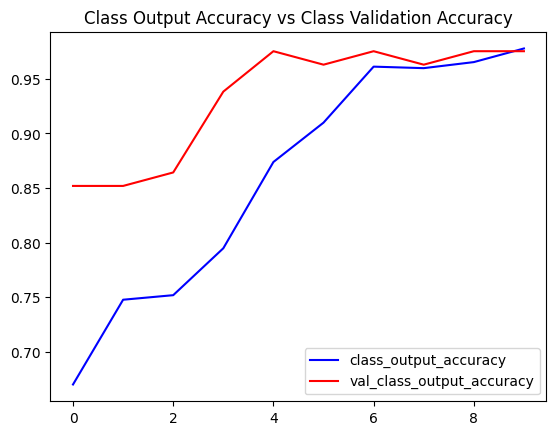

In [40]:
plot( 'class_output_accuracy', 'val_class_output_accuracy', 'Class Output Accuracy vs Class Validation Accuracy')

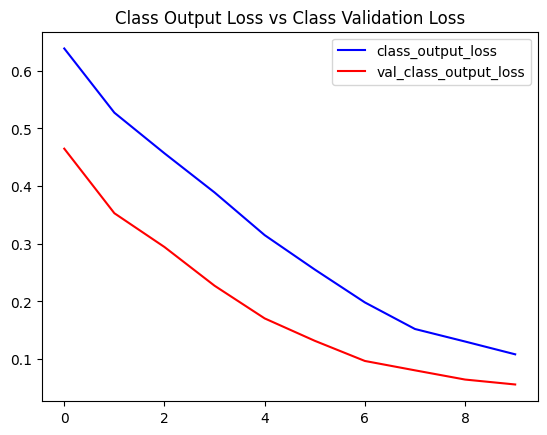

In [41]:
plot( 'class_output_loss', 'val_class_output_loss', 'Class Output Loss vs Class Validation Loss')

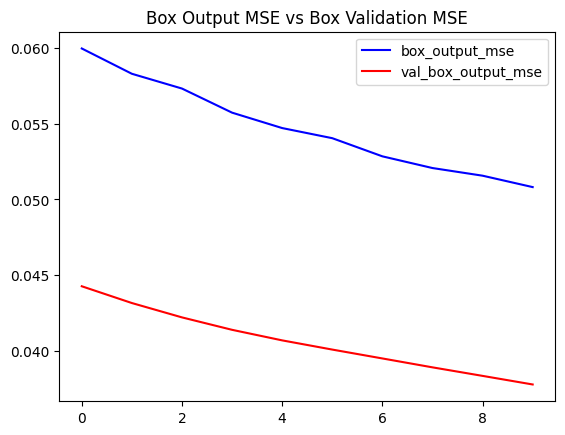

In [42]:
plot( 'box_output_mse', 'val_box_output_mse', 'Box Output MSE vs Box Validation MSE')

In [75]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = model.predict(train_images)  # Modelin tahminleri

# Gerçek sınıf etiketleri
y_true = train_img # Test verilerinin gerçek etiketleri

# Konfigürasyon matrisinin oluşturulması
confusion = confusion_matrix(y_true, y_pred)

# Konfigürasyon matrisinin görselleştirilmesi (isteğe bağlı)
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Tahminler')
plt.ylabel('Gerçek Değerler')
plt.show()

# Sınıflandırma raporunun alınması
classification_rep = classification_report(y_true, y_pred)
print(classification_rep)


23/23 [==============================] - 53s 2s/step


ValueError: Found input variables with inconsistent numbers of samples: [802, 2]